# 3장: 평균과 표준편차
## 8. 실제 데이터를 이용한 연습문제

대우데이터를 이용하여 다음 문제에 답하라.

In [1]:
from ggplot import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd

c:\python\python35\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
c:\python\python35\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
c:\python\python35\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_excel('data/Dri95-1.xls')
# 빈소득은 제외해버리자
df = df[np.isnan(df.H21) == False]

In [3]:
def print_mean_std_median(data):
    print('평균: {0}'.format(np.mean(data)))
    print('중앙값: {0}'.format(np.median(data)))
    print('표준편차: {0}'.format(np.std(data)))

### (1) 직업이 봉급생활자나 자영업자(JOB1의 코드가 1이나 2)인 가구주 전체를 봉급생활자와 자영업나로 나누어 월소득의 평균, 중앙값, 표준편차를 구하라. 위 통계량에 입각하여 봉급생활자와 자영업자간 근로소득의 분포가 어떻게 다른지 논하라.

### 코드

|명칭|코드|비고|
|------|------|-----|
|성별|SEX1|남성(1)|
|||여성(2)|
|결혼상태|MAR|기혼(1)|
|||미혼(2)|
|||이혼(3)|
|||별거(4)|
|||사별(5)|
|주거만족도|H11|1~5|
|입주 형태|H13|자가(1)|
|||전세(2)|
|||월세(3)|
|||기타(4)|
|주택 가격은?|H14|전월세의 경우 전월세|
|경제 사정은?|H17|1~5|
|가족 구성원 중 소득자 숫자|H20||
|수입|H21||
|금융상품 수익|H22||
|부동산 매매 소득|H23,H24|(둘다 같은 질문으로 되어 있음)|
|불로 소득|H25||
|나이|AGE1, AGE2|AGE2는 만 나이로 보임|
|흠연여부|P1|흡연(1)|
|||비흡연(2)|
|음주여부|P2|음주(1)|
|||비음주(2)|
|소득보다 여가활동 중시|P3|예(1)|
|||아니요(2)|
|환경보존에 세금낼 생각?|P4|예(1)|
|||아니요(2)|
|남북 통일에 세금 낼 생각?|P5|예(1)|
|||아니요(2)|
|한달 평균 용돈|P6||
|직업|JOB1|봉급생활(01)|
|||자영업/자유업(02)|
|||농림수산업(03)|
|||비정규직(04)|
|||미취업(05)|
|||무급 가족봉사(06)|
|||가사/전업주부(07)|
|||학생(08)|
|||연로(10)|
|||기타(12)|

In [4]:
# 봉급 생활자 중에 nan 값이 있어서 제외함
봉급_생활자 = df[df.JOB1 == 1]
자영업자 = df[df.JOB1 == 2]

print('# 봉급생활자 월급')
print_mean_std_median(봉급_생활자.H21)
print('# 자영업자 월급')
print_mean_std_median(자영업자.H21)

# 봉급생활자 월급
평균: 1974.5470085470085
중앙값: 1800.0
표준편차: 890.2814305420361
# 자영업자 월급
평균: 2013.9
중앙값: 1800.0
표준편차: 985.397238004383


평균으로 보면 비슷하다. 중앙값을 보면, 자영업자가 좀 더 고소득자가 많은 편이다.

그래프로 그려보자.

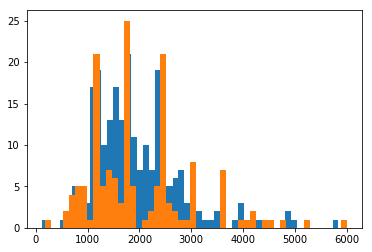

In [5]:
plt.hist(sorted(봉급_생활자.H21), bins=50)
plt.hist(sorted(자영업자.H21), bins=50)
plt.show()

### (2) 봉급생활자 및 자영업자 각각의 집단에서 연령과 소득이 어떠한 관계를 갖고 있는지 분석하고자 한다. 이를 위해여, 가구주들을 근로상태에 따라 봉급생활자와 자영업자로 나누고 또 각각의 근로상태별로 연령에 따라 25-29, 30-34,... 55-59 등 7개 연령집단으로 나눈다. 그리하여 총 2x7=14의 하부집단을 고려한다.
- 각 하부집단별로 평균근로소득을 구하고 연령과 소득의 관계를 그래프로 표현하라.
- 위의 결과를 기초로 한 개인의 소득이 연령에 따라 어떻게 변화해 가는지 알 수 있는가? 
- 알 수 있으면 그 관계를 설명하고, 알 수 없으면 왜 알 수 없는지 그 이유를 밝히라.

코드

- 연령 : AGE1, AGE2
(왜 1,2로 나눠졌는지 설명이 없는데, AGE2가 만나이가 아닐까 싶다.)

In [6]:
# 나이별로 7개 집단을 구분하자.
age_level = [(25,29),(30,34),(35,39),(40,44),(45,49),(50,54),(55,59)]

age_level_봉급 = []
age_level_자영업 = []
for level in age_level:
    age_level_봉급.append(
        봉급_생활자[(봉급_생활자.AGE1 >= level[0]) & (봉급_생활자.AGE1 <= level[1])]
    )
    age_level_자영업.append(
        자영업자[(자영업자.AGE1 >= level[0]) & (자영업자.AGE1 <= level[1])]
    )

In [156]:
# 나이대별 & 업종별 평균과 표준편차를 확인해보자
봉급생활자_나이별_df = pd.DataFrame(columns=['code', 'age', 'mean', 'std', 'median'])
for item, age in zip(age_level_봉급, age_level):
    봉급생활자_나이별_df.loc[len(봉급생활자_나이별_df)] = ['0', age[0], np.mean(item.H21), np.std(item.H21), np.median(item.H21)]

자영업자_나이별_df = pd.DataFrame(columns=['code', 'age', 'mean', 'std', 'median'])
for item, age in zip(age_level_자영업, age_level):
    자영업자_나이별_df.loc[len(자영업자_나이별_df)] = ['1', age[0], np.mean(item.H21), np.std(item.H21), np.median(item.H21)]

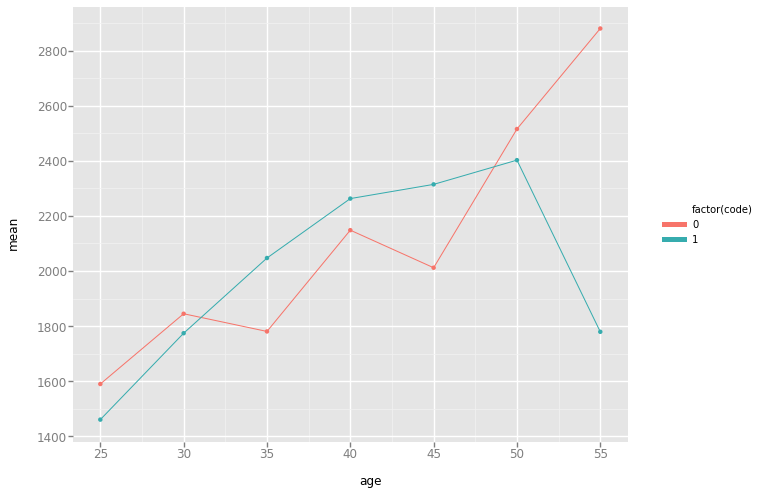

<ggplot: (-9223371928475147618)>

In [193]:
ggplot(봉급생활자_나이별_df.append(자영업자_나이별_df), aes(x='age', y='mean', group='code', color='factor(code)')) +\
    geom_line() +\
    geom_point()

25~50세까지의 평균 수익은 비슷하다. 55세 이상에서 서로간의 차이가 확 벌어진다.

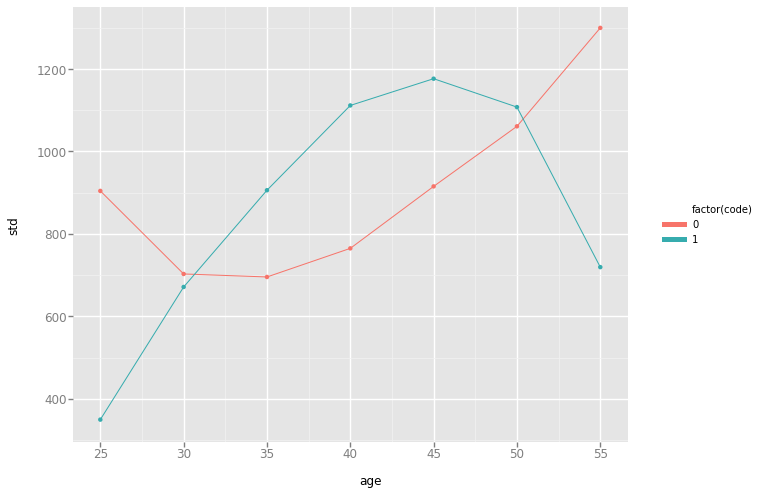

<ggplot: (108379654941)>

In [194]:
ggplot(봉급생활자_나이별_df.append(자영업자_나이별_df), aes(x='age', y='std', group='code', color='factor(code)')) +\
    geom_line() +\
    geom_point()

봉급생활자: 25세에 표준편차가 크다. 사회 초년생에게 '어떤 시작'을 하느냐에 따라 수준이 큰 차이를 난다고 말해준다. 30대에 편차가 줄어들었다가 55세에 편차가 증가한다. 아마도 전문성이나 조직사회 적응(?)이 이런 차이를 만들지 않나 싶다.

자영업자: 25세에 시작은 모두 평등한 가난(?)으로 시작한다. 30~40대로 갈수록 편차가 커지고, 55세 이상에서 줄어든다.

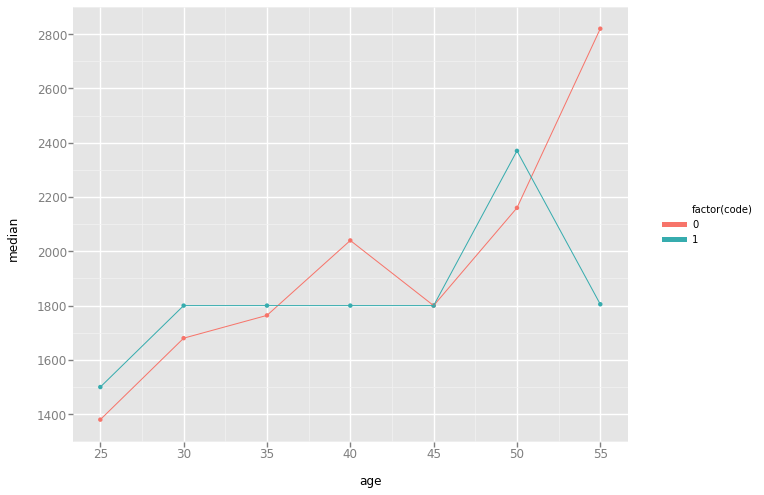

<ggplot: (-9223371928475432539)>

In [189]:
ggplot(봉급생활자_나이별_df.append(자영업자_나이별_df), aes(x='age', y='median', group='code', color='factor(code)')) +\
    geom_line() +\
    geom_point()

평균값과 중앙값이 거의 일치한다. 매끈한(?) 정규분포를 그리고 있다는 말이다.

### 정리하자면 아래와 같다.

|봉급생활자|자영업자|
|---|---|
|나이가 듦에 따라 소득이 같이 증가한다.|나이가 듦에 따라 소득이 증가하나 55세에서 떨어진다.|
|20대와 50대에 소득 편차가 크다.|30~40대에 소득편차가 크다.|

### 왜 이런 차이가 날까?

이 데이터는 1994년 데이터이다.
- 50~60대는 1940~50년대 생이다. 전쟁을 겪고 가난하게 살았던 세대이다. 이 중에서는 진취적으로 나아가서 성공의 역사를 만든 사람도 있겠지만, 대개는 그렇지 못한 경우가 많았을 것이다. 열악한 교육환경 속에서 젊은 시절을 보내고, 이제는 빠른 시대의 발전 속도에 맞쳐가지 못하여 소득이 떨어진 게 아닐까.
- 20대의 평균 소득은 비슷하지만 편차는 차이가 크다. 이는 대기업과 중소기업에 입사한 후 소득차이가 꽤 있어서 그런게 아닐까 싶다.
- 나이가 클 수록 평균도 높아지지만, 편차도 증가한다. 나이에 따라 소득이 오르긴 하지만, 연공서열이 꽤 역할을 한 것 같지만, 꼭 연공서열이 모두에게 적용되는 것이 아님을 보여준다고 생각한다. 나이가 높아짐에 따라 평균적으로 소득이 증가하는 것은 맞지만, 그만큼 편차도 증가한다는 말은 나이만이 그 사람의 소득을 결정하는게 아님을 보여주는게 아닐까 싶다.
- 1994년의 시대적 배경을 잘 모르니까 추측하기가 힘들다. 대략적으론 1996년 전까진 호황기로 알고 있는데, 뒤져보다보니 1990년대 초부터 공무원에 대한 사람들의 관심이 높아졌다고 한다. 단순히 경제가 좋기 때문에 취직했던게 아니라, 안정적인 직장을 원하는 사람들이 많아졌다는 이야기도 있었다. 자세히는 모르니... 아쉽지만 표면적인 해석으로 마무리를 한다.

### (3) 음주자와 비음주자의 평균소득을 비교하여 음주가 소득에 미치는 영향을 분석하라.
- 음주와 소득의 관계에 혼동요인으로 작용할 가능성이 있는 변수를 둘 이상 제시하고, 기 이유를 설명하라.
- 혼동요인은 데이터에 들어있는 변수 중에서 선택하라. 
- 참고로 대우데이터는 음주자의 경우 P2 값이 1이고, 비음주자의 경우 P2값이 2이다.

In [233]:
# 음주와 비음주간의 소득차이를 보자
음주_df = df[(df.P2 == 1) & (np.isnan(df.H21) == False)]
비음주_df = df[(df.P2 == 2) & (np.isnan(df.H21) == False)]

print('# 음주')
print_mean_std_median(음주_df.H21)
print('# 비음주')
print_mean_std_median(비음주_df.H21)

# 음주
평균: 1929.2553191489362
중앙값: 1800.0
표준편차: 986.0488137407851
# 비음주
평균: 1700.0857142857142
중앙값: 1527.0
표준편차: 962.4666115597709


비음주자가 확연하게 소득의 평균과 중앙값이 낮다. 음주를 하지 않을 때, 소득이 낮은 것으로 보인다.

위 연구 결과를 토대로, 음주여부가 근로소득의 차이를 만들었다!라고 발표한 뉴스가 있다고 생각해보자. (마치 진보와 보수의 근육 두께 뉴스마냥...) 이 연구 결과를 그대로 받아들이면 될까.

위 연구 결과는 음주와 비음주 간의 소득격차에 대한 상관관계를 파악했다. 그러나 상관관계에 있다하여 인과성이 있다고 판단할 수는 없다. 게다가 음주와 비음주가 제대로 통제되어 있지 않다.

다른 요인(혼동요인)들에도 영향을 받는건 아닐까?

In [244]:
# 남여의 차이가 있지 않을까?
print('# 남성')
print('숫자: {0}'.format(len(df[df.SEX1 == 1])))
print_mean_std_median(df[df.SEX1 == 1].H21)
print('비음주자: {0}'.format(len(df[(df.SEX1 == 1) & (df.P2 == 2)])))
print('# 여성')
print('숫자: {0}'.format(len(df[df.SEX1 == 2])))
print_mean_std_median(df[df.SEX1 == 2].H21)
print('비음주자: {0}'.format(len(df[(df.SEX1 == 2) & (df.P2 == 2)])))

# 남성
숫자: 435
평균: 1882.832183908046
중앙값: 1800.0
표준편차: 962.0549041008138
비음주자: 113
# 여성
숫자: 34
평균: 1579.5588235294117
중앙값: 1080.0
표준편차: 1203.1246864916682
비음주자: 27


남성은 약 75%가 음주를 하고, 여성은 약 20%가 음주를 한다. 여성의 낮은 소득으로 인해, 비음주자의 소득이 더 낮게 측정된 건 아닐까? 남성만을 대상으로 음주자와 비음주자를 비교해본다면?

In [246]:
print('# 음주자 남성')
음주자_남성_df = df[(df.SEX1 == 1) & (df.P2 == 1)]
print('숫자: {0}'.format(len(음주자_남성_df)))
print_mean_std_median(음주자_남성_df.H21)
print('# 비음주자 남성')
비음주자_남성_df = df[(df.SEX1 == 1) & (df.P2 == 2)]
print('숫자: {0}'.format(len(비음주자_남성_df)))
print_mean_std_median(비음주자_남성_df.H21)

# 음주자 남성
숫자: 322
평균: 1920.0652173913043
중앙값: 1800.0
표준편차: 975.4768854933392
# 비음주자 남성
숫자: 113
평균: 1776.7345132743362
중앙값: 1660.0
표준편차: 914.4607000821164


여전히 차이가 난다. 여기서 더 하부조건으로, 직종을 나눠보면 어떨까.

In [251]:
# 직종_category = [(1,'봉급생활'), (2,'자영업'), (3,'농림수산업'), (4,'비정규직'), (5,'미취업'), (6,'무급가족봉사'), (7,'가사/전업주부'), (8,'학생'), (10,'연로'), (12,'기타')]
직종_category = [(1,'봉급생활'), (2,'자영업')]

print('# 음주자')
for code, 직종명 in 직종_category:
    print('## ' + 직종명)
    직종별_음주자_남성_df = 음주자_남성_df[음주자_남성_df.JOB1 == code]
    print('숫자: {0}'.format(len(직종별_음주자_남성_df)))
    print_mean_std_median(직종별_음주자_남성_df.H21)
    
print('# 비음주자')
for code, 직종명 in 직종_category:
    print('## ' + 직종명)
    직종별_비음주자_남성_df = 비음주자_남성_df[비음주자_남성_df.JOB1 == code]
    print('숫자: {0}'.format(len(직종별_비음주자_남성_df)))
    print_mean_std_median(직종별_비음주자_남성_df.H21)
    
# 그래프로 그려서 비교해볼 수는 없을까?

# 음주자
## 봉급생활
숫자: 176
평균: 1981.5568181818182
중앙값: 1800.0
표준편차: 861.5163410305131
## 자영업
숫자: 105
평균: 2126.0285714285715
중앙값: 1800.0
표준편차: 1002.5400736048776
# 비음주자
## 봉급생활
숫자: 51
평균: 2058.823529411765
중앙값: 1800.0
표준편차: 941.9361101076855
## 자영업
숫자: 36
평균: 1813.9722222222222
중앙값: 1730.0
표준편차: 736.5075426222777


In [213]:
# 직종에 따라 음주와 비음주의 차이가 있을까?
직종_category = [1, 2, 3, 4, 5, 6, 7, 10, 12]
음주_직종별_숫자_df = pd.DataFrame(columns=['직종','count'])
for 직종 in 직종_category:
    음주_직종별_숫자_df.loc[len(음주_직종별_숫자_df)] = [직종, len(음주_df[음주_df.JOB1 == 직종])]

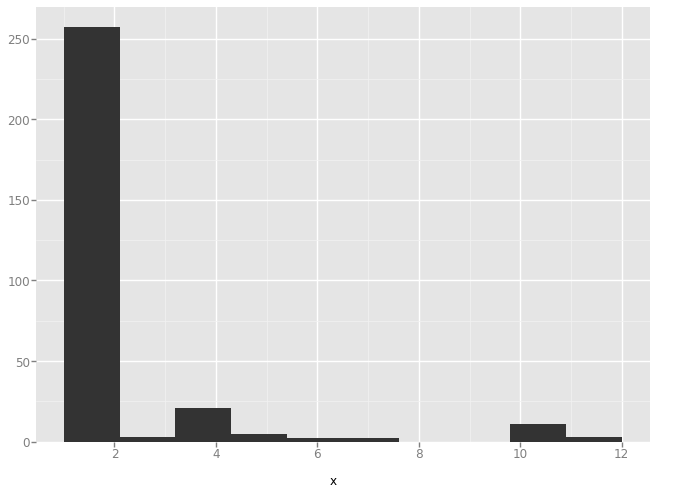

<ggplot: (108380373161)>

In [223]:
qplot(음주_df.JOB1)

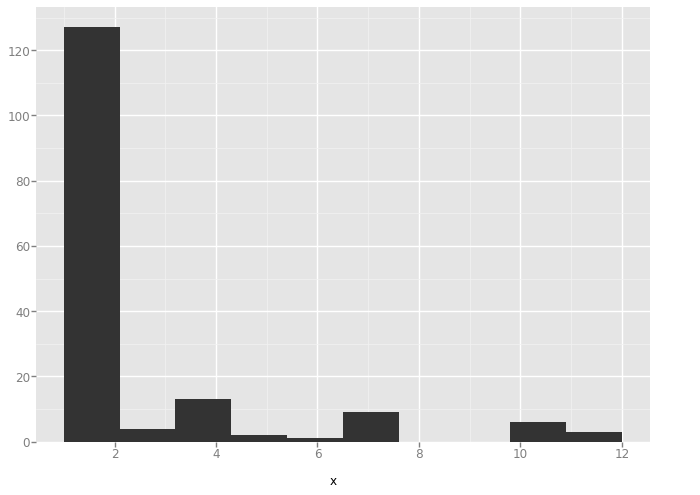

<ggplot: (108379942576)>

In [224]:
qplot(비음주_df.JOB1)